In [330]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [331]:
data_set = load_iris()
X_independent_variables = data_set.data[0:100, :]
y_dependent_variable = data_set.target[0:100]

print(f"Dimension of X: {X_independent_variables.shape}")
print(f"Dimension of y: {y_dependent_variable}")
print(f"X independent variables: \n{X_independent_variables}")
print(f"y dependent variable: \n{y_dependent_variable}")

Dimension of X: (100, 4)
Dimension of y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
X independent variables: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3

<h1>Standardizing data</h1>

In [332]:
def standarize_data(X):
    mean = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_standarded = (X-mean)/sigma
    return X_standarded, mean, sigma

In [333]:
def split_data(X, y, percentage_train = 80.0):
    np.random.seed(100)
    number_of_all_datapoints = X.shape[0]
    number_of_train_datapoints = int(np.round(X.shape[0]*percentage_train/100))
    indices_train = np.random.choice(number_of_all_datapoints, number_of_train_datapoints, replace=False).tolist()
    indices_test = list(set(np.arange(X.shape[0]))-set(indices_train))
    
    X_train = X[indices_train, :]
    y_train = y[indices_train]
    X_test = X[indices_test, :]
    y_test = y[indices_test]
    
    return X_train, y_train, X_test, y_test

In [334]:
X_train, y_train, X_test, y_test = split_data(X_independent_variables, y_dependent_variable)

print(f"Dimension of X training data: {X_train.shape}")
print(f"Dimension of y training data: {y_train.shape}")

print(f"X training data: {X_train}")
print(f"y training data: {y_train}")
print(f"X test data: {X_test}")
print(f"y test data: {y_test}")

Dimension of X training data: (80, 4)
Dimension of y training data: (80,)
X training data: [[4.9 3.6 1.4 0.1]
 [6.  2.2 4.  1. ]
 [5.  3.4 1.6 0.4]
 [4.5 2.3 1.3 0.3]
 [5.  3.2 1.2 0.2]
 [5.  3.  1.6 0.2]
 [5.5 3.5 1.3 0.2]
 [5.5 4.2 1.4 0.2]
 [6.7 3.  5.  1.7]
 [5.1 3.7 1.5 0.4]
 [6.  3.4 4.5 1.6]
 [7.  3.2 4.7 1.4]
 [5.8 2.6 4.  1.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.9 4.2 1.3]
 [6.  2.9 4.5 1.5]
 [6.3 2.5 4.9 1.5]
 [5.4 3.9 1.7 0.4]
 [5.  3.5 1.3 0.3]
 [4.8 3.4 1.6 0.2]
 [4.7 3.2 1.6 0.2]
 [6.  2.7 5.1 1.6]
 [5.8 2.7 3.9 1.2]
 [5.  3.5 1.6 0.6]
 [5.2 3.4 1.4 0.2]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [5.5 2.6 4.4 1.2]
 [6.7 3.1 4.7 1.5]
 [5.4 3.4 1.7 0.2]
 [5.2 4.1 1.5 0.1]
 [4.6 3.4 1.4 0.3]
 [4.6 3.1 1.5 0.2]
 [4.8 3.  1.4 0.1]
 [6.4 3.2 4.5 1.5]
 [5.4 3.  4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [5.6 2.9 3.6 1.3]
 [6.5 2.8 4.6 1.5]
 [6.2 2.2 4.5 1.5]
 [6.6 3.  4.4 1.4]
 [6.4 2.9 4.3 1.3]
 [4.9 2.4 3.3 1. ]
 [4.4 3.2 1.3 0.2]
 [6.8 2.8 4.8 1.4]
 [5.7 2.8 4.1 1.3]
 [5.1 3.5 1.4 0.3]
 [5.  2.3 3.3 1.

In [335]:
X_train_standarded, _, _ = standarize_data(X_train)
X_test_standarded, mean_test, sigma_test = standarize_data(X_test)

print(f"Standarded X training data: {X_train_standarded}")
print(f"Standarded X testing data: {X_test_standarded}")

Standarded X training data: [[-0.89579773  1.15786408 -1.04172561 -1.25212374]
 [ 0.81418492 -2.05205614  0.74164004  0.32673632]
 [-0.74034476  0.69930405 -0.90454364 -0.72583705]
 [-1.5176096  -1.82277613 -1.1103166  -0.90126595]
 [-0.74034476  0.24074402 -1.17890759 -1.07669484]
 [-0.74034476 -0.21781602 -0.90454364 -1.07669484]
 [ 0.03692008  0.92858407 -1.1103166  -1.07669484]
 [ 0.03692008  2.53354418 -1.04172561 -1.07669484]
 [ 1.90235569 -0.21781602  1.42754991  1.55473858]
 [-0.58489179  1.3871441  -0.97313463 -0.72583705]
 [ 0.81418492  0.69930405  1.08459498  1.37930968]
 [ 2.36871459  0.24074402  1.22177695  1.02845189]
 [ 0.50327898 -1.13493608  0.74164004  0.67759411]
 [ 0.19237305 -1.3642161   0.67304906  0.50216521]
 [ 0.34782602 -0.44709603  0.87882202  0.853023  ]
 [ 0.81418492 -0.44709603  1.08459498  1.20388079]
 [ 1.28054382 -1.3642161   1.35895893  1.20388079]
 [-0.11853289  1.84570413 -0.83595265 -0.72583705]
 [-0.74034476  0.92858407 -1.1103166  -0.90126595]
 [-

<h1>Logistic Regression for classification</h1>
<h3 style="color: green">Hypothesis:</h3>

\begin{equation*}
    h_\theta(x) = g(\theta^Tx)
\end{equation*}

Hypothesis is a function, that maps our inputs and model's parameters to the output results. <b>It's our model!</b>

<h4>Sigmoid:</h4>

\begin{equation*}
    g(z) = \frac{1}{1+e^{-z}}
\end{equation*}

<img src='https://miro.medium.com/v2/resize:fit:1280/1*OUOB_YF41M-O4GgZH_F2rw.png' />

<h3 style="color: red">Cost function: </h3>

\begin{equation*}
	J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)}\log(h_\theta(x^{(i)})) - (1-y^{(i)})\log(1-h_\theta(x^{(i)}))]	
\end{equation*}

It's Binary Cross Entropy that will produce cost of our model!.
We must <b>minimize cost function</b> by changing the model's parameters (theta).

<h3 style="color: cyan">Optimization by using <b>Linear Gradient</b></h3>

\begin{equation*}
    \theta_n := \theta_n - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_n}
\end{equation*}

In [336]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [337]:
def compute_cost_and_gradient(X, y, theta):
    J_cost = -(np.dot(y, np.log2(sigmoid(np.dot(X, np.transpose(theta)))))+
               np.dot((1-y), np.log2(1-sigmoid(np.dot(X, np.transpose(theta))))))/X.shape[0]
    gradient = np.dot(np.transpose(X), sigmoid(np.dot(X, np.transpose(theta)))-y)/X.shape[0]
    return J_cost, gradient

Example cost and gradient:

In [338]:
J_cost, gradient = compute_cost_and_gradient(
    X_independent_variables, y_dependent_variable, np.zeros(X_train_standarded.shape[1])
)

print(f"Cost: {J_cost}")
print(f"Gradient: {gradient}")

Cost: 1.0
Gradient: [-0.2325  0.1645 -0.6995 -0.27  ]


<b>Training model by using J cost function and linear gradient:</b>

In [339]:
def train_logistic_regression(X, y, alpha = 0.01):
    number_of_iterations = 500
    theta = np.zeros((X.shape[1]))
    J_cost_results = np.zeros(number_of_iterations)
    
    for i in range(number_of_iterations):
        J_cost_result, gradient = compute_cost_and_gradient(X, y, theta)
        J_cost_results[i] = J_cost_result
        theta = theta - alpha*gradient
    
    plt.figure()
    plt.plot(J_cost_results)
    plt.title("Training model effects - cost changes - J(i)")
    plt.xlabel("Number of iteration - i [-]")
    plt.ylabel("Value of cost function - J [-]")
    plt.show(block=False)
    
    return theta

<b>Prediction for logistic regression f(X, theta) = y by using Hypothesis and the best theta</b>

In [340]:
def predict_logistic_regression(X, theta):
    pred = np.round(sigmoid(np.dot(X, np.transpose(theta))))
    return pred

In [341]:
y_output = predict_logistic_regression(X_train[0:5], np.zeros(X_train.shape[1]))
print(f"Example prediction by using zeroed parameters: {y_output}")

Example prediction by using zeroed parameters: [0. 0. 0. 0. 0.]


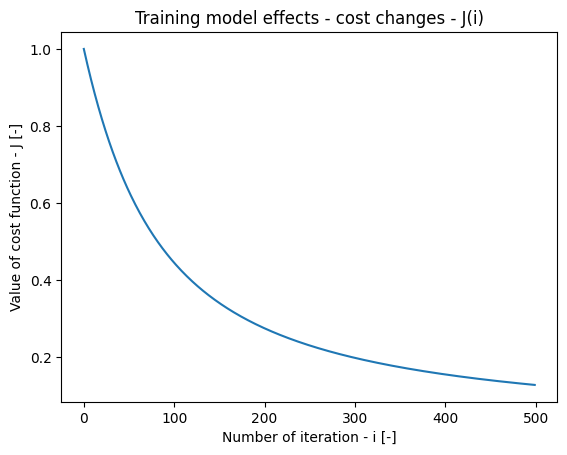

The best theta (minimized for cost function): [ 0.61012358 -0.61697219  0.86152976  0.85066069]
y_test: [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
y_predicted: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy of the model: 100.0 [%]


In [342]:
theta = train_logistic_regression(X_train_standarded, y_train)
y_predicted = predict_logistic_regression(X_test_standarded, theta)
accuracy = np.mean(y_predicted==y_test)
print(f"The best theta (minimized for cost function): {theta}")
print(f"y_test: {y_test}")
print(f"y_predicted: {y_predicted}")
print(f"Accuracy of the model: {accuracy*100} [%]")

<h2><b>Classification by using Scikit-learn libraries:</b></h2>

- logistic regression model - `linear_model.LogisticRegression`,
- decision tree model - `tree.DecisionTreeClassifier`,
- *k*-NN model - `neighbors.KNeighborsClassifier`,
- accuracy metric - `metrics.accuracy_score`,
- standardizing data - `preprocessing.StandardScaler`,
- splitting data to training and testing - `model_selection.train_test_split`

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<b>1. Splitting data:</b>

In [344]:
X_train, X_test, y_train, y_test = train_test_split(
    X_independent_variables,
    y_dependent_variable,
    train_size=0.7
)

print(f"X training data: {X_train}")
print(f"y training data: {y_train}")
print(f"X test data: {X_test}")
print(f"y test data: {y_test}")

X training data: [[6.1 3.  4.6 1.4]
 [6.  2.9 4.5 1.5]
 [5.  2.3 3.3 1. ]
 [6.9 3.1 4.9 1.5]
 [5.6 2.9 3.6 1.3]
 [5.7 2.9 4.2 1.3]
 [5.  3.4 1.5 0.2]
 [4.4 3.  1.3 0.2]
 [5.5 2.4 3.7 1. ]
 [6.  3.4 4.5 1.6]
 [4.7 3.2 1.6 0.2]
 [5.5 2.4 3.8 1.1]
 [5.  2.  3.5 1. ]
 [4.6 3.2 1.4 0.2]
 [5.5 4.2 1.4 0.2]
 [5.  3.3 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [6.1 2.8 4.  1.3]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 3.  4.2 1.2]
 [4.6 3.1 1.5 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.4 1.6 0.4]
 [6.  2.7 5.1 1.6]
 [5.4 3.9 1.7 0.4]
 [6.4 2.9 4.3 1.3]
 [4.7 3.2 1.3 0.2]
 [5.2 3.4 1.4 0.2]
 [5.6 3.  4.1 1.3]
 [5.  3.5 1.3 0.3]
 [5.8 2.6 4.  1.2]
 [5.1 3.5 1.4 0.2]
 [6.1 2.9 4.7 1.4]
 [4.9 2.4 3.3 1. ]
 [5.1 3.8 1.9 0.4]
 [5.7 3.8 1.7 0.3]
 [6.1 2.8 4.7 1.2]
 [5.8 2.7 3.9 1.2]
 [4.4 2.9 1.4 0.2]
 [5.4 3.7 1.5 0.2]
 [5.4 3.4 1.7 0.2]
 [5.8 2.7 4.1 1. ]
 [4.8 3.  1.4 0.1]
 [5.4 3.9 1.3 0.4]
 [5.6 2.7 4.2 1.3]
 [6.7 3.  5.  1.7]
 [4.8 3.  1.4 0.3]
 [5.1 3.5 1.4 0.3]
 [5.7 2.8 4.5 1.3]
 [4.8 3.4 1.9 0.2]
 [5.6 3.  4.5 

<b>2. Standardizing X_train and X_test data:</b>

In [345]:
standard_scaler = StandardScaler()
X_train_standarded = standard_scaler.fit_transform(X_train)
X_test_standarded = standard_scaler.fit_transform(X_test)

print(f"X training standarded data: {X_train_standarded}")
print(f"X testing standarded data: {X_test_standarded}")

X training standarded data: [[ 1.0946559  -0.18510948  1.29436799  1.20552424]
 [ 0.93401458 -0.4047309   1.22380276  1.38739212]
 [-0.6723987  -1.72245943  0.37701996  0.47805272]
 [ 2.37978653  0.03451194  1.50606369  1.38739212]
 [ 0.29144927 -0.4047309   0.58871566  1.02365636]
 [ 0.45209059 -0.4047309   1.01210706  1.02365636]
 [-0.6723987   0.6933762  -0.89315424 -0.97689033]
 [-1.63624667 -0.18510948 -1.0342847  -0.97689033]
 [ 0.13080794 -1.50283801  0.65928089  0.47805272]
 [ 0.93401458  0.6933762   1.22380276  1.56926   ]
 [-1.15432268  0.25413336 -0.822589   -0.97689033]
 [ 0.13080794 -1.50283801  0.72984613  0.6599206 ]
 [-0.6723987  -2.38132369  0.51815043  0.47805272]
 [-1.31496401  0.25413336 -0.96371947 -0.97689033]
 [ 0.13080794  2.45034757 -0.96371947 -0.97689033]
 [-0.6723987   0.47375478 -0.96371947 -0.97689033]
 [-0.83304003 -0.18510948 -0.96371947 -0.97689033]
 [ 1.0946559  -0.62435233  0.87097659  1.02365636]
 [-1.79688799 -0.18510948 -1.17541517 -1.15875821]
 [ 

<u>Steps in Sci-kit learn ML models:</u>
1. In order to train model (based on standarded training data) we have to use `fit` method.
2. To get prediction we have to use `predict` method.
3. To get accuracy of the model for the standarded test data we have to use `accuracy_score` method.

In [346]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_standarded, y_train)
y_predicted = logistic_regression_model.predict(X_test_standarded)
accuracy = accuracy_score(y_test, y_predicted)

print(f"Accuracy of the model on testing data: {accuracy*100} [%]")

Accuracy of the model on testing data: 100.0 [%]


<b>Other classifiers:</b>

1. Decision Tree Classifier Model from `tree.DecisionTreeClassifier`

In [347]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train_standarded, y_train)
y_predicted = model.predict(X_test_standarded)
accuracy = accuracy_score(y_test, y_predicted)

print(f"Accuracy of the Decision Tree Classifier Model: {accuracy*100} [%]")

Accuracy of the Decision Tree Classifier Model: 100.0 [%]


2. *k*-Nearest Neighbors Classifier Model from `neighbors.KNeighborsClassifier`

In [348]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_standarded, y_train)
y_predicted = model.predict(X_test_standarded)
accuracy = accuracy_score(y_test, y_predicted)

print(f"Accuracy of the K-Nearest Neighbor Classifier: {accuracy*100} [%]")

Accuracy of the K-Nearest Neighbor Classifier: 100.0 [%]
